### We have the following microscopic model with Mean-firing rate for each population

$$\lambda_E(t)=\mu_E+\sum_{i_E}\overbrace{n_{EE}}^{\approx g_EN_E^2?}\phi\left(t-t_{i_E}^E\right)-\sum_{i_I}\overbrace{n_{IE}}^{\approx g_IN_IN_E?}\phi\left(t-t_{i_I}^I\right)$$
$$\lambda_I(t)=\mu_I+\sum_{i_E}\underbrace{n_{EI}}_{\approx g_EN_EN_I?}\phi\left(t-t_{i_E}^E\right)-\sum_{i_I}\underbrace{n_{II}}_{\approx g_IN_I^2?}\phi\left(t-t_{i_I}^I\right)$$

#### We consider Kronecker's delta kernel, therefore, the associated differential equations are:

$$\dot{\lambda}_E(t)=\dfrac{\mu_E-\lambda_E}{\tau}+\sum_{i_E}n_{EE}\delta\left(t-t_{i_E}^E\right)-\sum_{i_I}n_{IE}\delta\left(t-t_{i_I}^I\right)$$
$$\dot{\lambda}_I(t)=\dfrac{\mu_I-\lambda_I}{\tau}+\sum_{i_E}n_{EI}\delta\left(t-t_{i_E}^E\right)-\sum_{i_I}n_{II}\delta\left(t-t_{i_I}^I\right)$$

The simulations gotta satisfy $g_I \sim 5-6 g_E$, $N_I\sim \frac{1}{5}N$ and $N_E\sim \frac{4}{5}N$

Our charasteristic time is $\tau=1$ 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def model(n_max, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt):
    """
    Solve the equations of the mena field model for a given number of iterations n_max
    
    Inputs:
    n_max: number of iterations
    mu_E: Poisson rate of excitatory neurons
    mu_I: Poisson rate of inhibitory neurons
    tau: characteristic time of the system
    n_EE: influence of excitatory neurons on excitatory neurons
    n_IE: influence of excitatory neurons on inhibitory neurons
    n_EI: influence of inhibitory neurons on excitatory neurons
    n_II: influence of inhibitory neurons on inhibitory neurons
    dt: time step

    Outputs:
    t_events_E: times of events of excitatory neurons
    t_events_I: times of events of inhibitory neurons
    rates_E: rates of excitatory neurons
    rates_I: rates of inhibitory neurons
    """
    n_E = n_I = n = 0
    t_events_E = [0]
    t_events_I = [0]
    rates_E = [mu_E]
    rates_I = [mu_I]
    time = [0]
    while n <= n_max:
        # Excitation neurons
        l_Enew = rates_E[-1]  + dt * (mu_E- rates_E[-1])/tau
        if np.random.uniform() < rates_E[-1]*dt:
            l_Enew += n_EE
            t_events_E.append(t_events_E[-1]+dt*np.random.uniform())
            n_E += 1
        if np.random.uniform() < rates_I[-1]*dt:
            l_Enew -= n_IE
            t_events_E.append(t_events_E[-1]+dt*np.random.uniform())
            n_E += 1

        # Inhibition neurons
        l_Inew = rates_I[-1] + dt * (mu_I- rates_I[-1])/tau
        if np.random.uniform() < rates_E[-1]*dt:
            l_Inew += n_EI
            t_events_I.append(t_events_I[-1]+dt*np.random.uniform())
            n_I += 1
        if np.random.uniform() < rates_I[-1]*dt:
            l_Inew -= n_II
            t_events_I.append(t_events_I[-1]+dt*np.random.uniform())
            n_I += 1
        rates_E.append(l_Enew)
        rates_I.append(l_Inew)
        time.append(time[-1]+dt)

        n = n_E + n_I
    return time, t_events_E, t_events_I, rates_E, rates_I

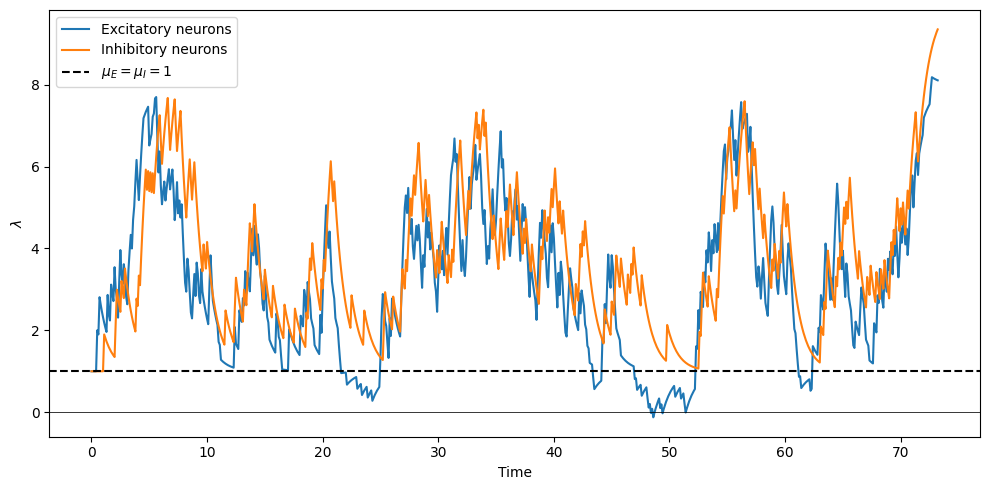

In [40]:
nmax = 1000
mu_E = 1
mu_I = 1
tau = 1
# These parameters are similar to the ones used in Growing Critical: Self-Organized Criticality in a Developing Neural System Felipe Yaroslav Kalle Kossio
"""n_EE = 1.5*(4/5)**2
n_IE = 7.5*4/(5**2)
n_EI = 1.5*4/(5**2)
n_II = 7.5*1/(5**2)"""
n_EE = 1.0
n_IE = 0.3
n_EI = 0.9
n_II = 0

dt = 0.1

time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)

total_rate= np.array(rates_E) - np.array(rates_I)

fig = plt.figure(figsize=(10, 5))
x1 = np.arange(0,len(rates_E),1)
x2 = np.arange(0,len(rates_I),1)
plt.plot(time, rates_E, label='Excitatory neurons')
plt.plot(time, rates_I, label='Inhibitory neurons')
#plt.plot(x1, total_rate, label='Total rate')
plt.xlabel('Time')
plt.axhline(1, label = '$\mu_E=\mu_I=1$', color = 'black', linestyle = '--')
plt.axhline(0, color = 'black',lw = 0.55)
plt.ylabel('$\lambda$')
plt.legend()
fig.tight_layout()


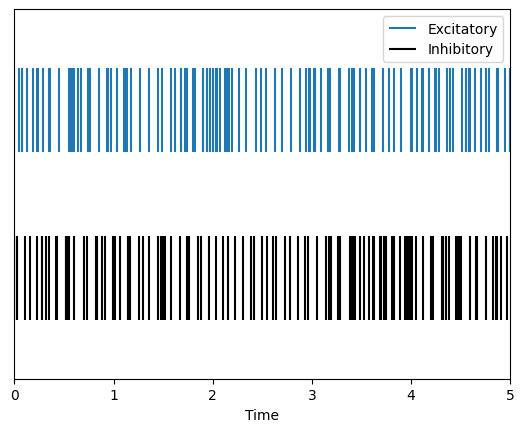

In [51]:
plt.eventplot(t_E, label = 'Excitatory')
plt.eventplot(t_I, label = 'Inhibitory', colors= 'black', lineoffsets= -1)
plt.xlim(0,5)
plt.xlabel('Time')
plt.yticks([])
plt.legend()
plt.tight_layout()